In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [25]:
# Data Cleaning
df.isnull().sum()

Row ID              0
Order ID            0
Order Date       5841
Ship Date        5985
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code        11
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
dtype: int64

In [27]:
df = df.dropna(subset=['Order Date', 'Ship Date', 'Postal Code'])
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [28]:
df.shape

(2672, 18)

In [32]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

In [30]:
# Sales Forecasting Analysis

## Project Overview
#This project analyzes a retail sales dataset to understand patterns and trends in sales volume over time.
#The goal is to extract business insights that could guide forecasting and operational decisions.

#Key tasks include data cleaning, time series exploration, trend analysis, and visualizations using Python and Pandas.

In [33]:
# Data Conversion and Type Validation
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date']  = pd.to_datetime(df['Ship Date'], errors='coerce')
df[['Order Date', 'Ship Date']].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [34]:
df[['Order Date', 'Ship Date']].isna().sum()

Order Date    0
Ship Date     0
dtype: int64

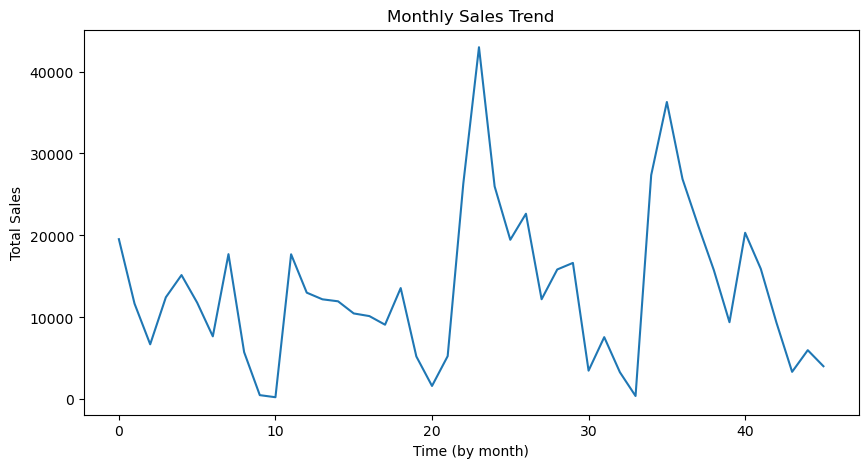

In [35]:
# Monthly Sales Trends
# Analysing how total sales evolve over time by aggregating sales at a monthly level
monthly_sales = (df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index())

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Time (by month)')
plt.ylabel('Total Sales')
plt.show()

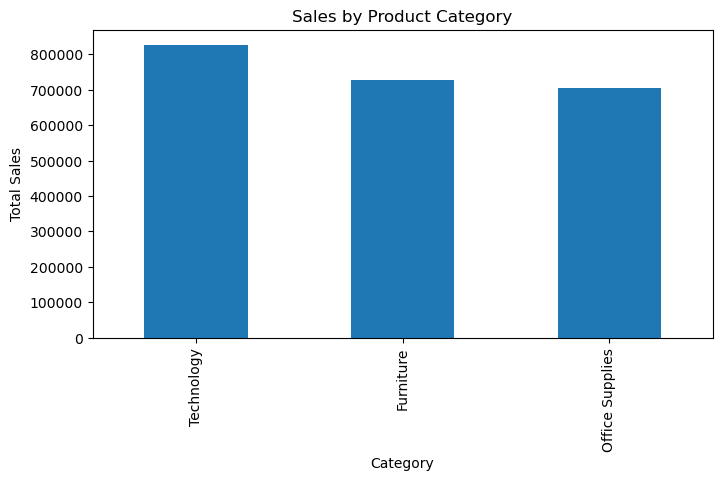

In [22]:
# Sales by Product Category
# Analysing total sales performance across different product categories to identify which contribute most to overall revenue.
category_sales=(df.groupby('Category')['Sales'].sum().sort_values(ascending=False))

category_sales.plot(kind='bar', figsize=(8,4), title='Sales by Product Category')
plt.ylabel('Total Sales')
plt.show()

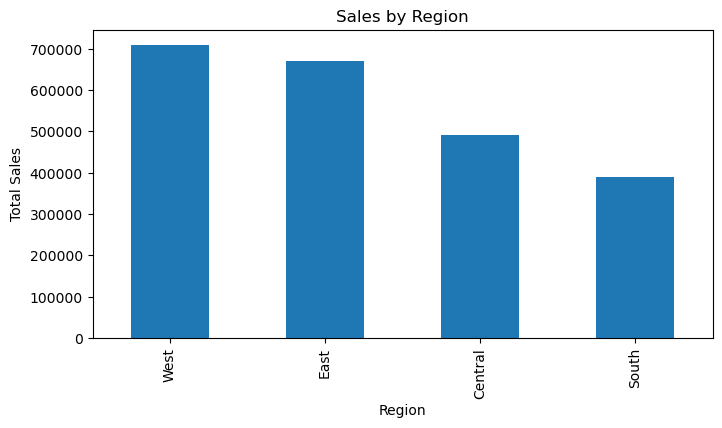

In [24]:
# Regional Sales Performance
# Analysing sales by region to provide insight into geographic differences in revenue generation.
region_sales = (df.groupby('Region')['Sales'].sum().sort_values(ascending=False))

region_sales.plot(kind='bar', figsize=(8,4), title='Sales by Region')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
# Key Insights and Observations
- Sales performance varies over time, indicating periods of stronger and weaker demand.
- Certain product categories account for a disproportionate share of total revenue.
- Regional differences in sales suggest that performance is not uniform across geographic markets.
